In [118]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from shapely.geometry import Point
from collections import Counter

In [23]:
companies = pd.read_csv('data/NETSData2022_RAFI(WithAddresses).txt', delimiter = '\t', encoding = 'ISO-8859-1')
naics = pd.read_csv('data/NAICS2022_RAFI.csv')
industry = pd.read_csv('data/2022-NAICS-Codes-6-digit.csv')


/var/folders/28/d80gdg0d7_z35rcy0h2kv97r0000gn/T/ipykernel_7905/1867838935.py:1: DtypeWarning: Columns (286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.
  companies = pd.read_csv('data/NETSData2022_RAFI(WithAddresses).txt', delimiter = '\t', encoding = 'ISO-8859-1')


In [24]:
list(companies.columns)

['DunsNumber',
 'Company',
 'TradeName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'ZIP4',
 'Officer',
 'Title',
 'Area',
 'Phone',
 'Region',
 'HQDuns',
 'HQCompany',
 'HQTradeName',
 'HQAddress',
 'HQCity',
 'HQState',
 'HQZipCode',
 'HQZIP4',
 'HQOfficer',
 'HQTitle',
 'HQArea',
 'HQPhone',
 'Subsidiary',
 'Related',
 'Kids',
 'CBSA',
 'FipsCounty',
 'CityCode',
 'Latitude',
 'Longitude',
 'LevelCode',
 'EstCat',
 'Emp90',
 'EmpC90',
 'Emp91',
 'EmpC91',
 'Emp92',
 'EmpC92',
 'Emp93',
 'EmpC93',
 'Emp94',
 'EmpC94',
 'Emp95',
 'EmpC95',
 'Emp96',
 'EmpC96',
 'Emp97',
 'EmpC97',
 'Emp98',
 'EmpC98',
 'Emp99',
 'EmpC99',
 'Emp00',
 'EmpC00',
 'Emp01',
 'EmpC01',
 'Emp02',
 'EmpC02',
 'Emp03',
 'EmpC03',
 'Emp04',
 'EmpC04',
 'Emp05',
 'EmpC05',
 'Emp06',
 'EmpC06',
 'Emp07',
 'EmpC07',
 'Emp08',
 'EmpC08',
 'Emp09',
 'EmpC09',
 'Emp10',
 'EmpC10',
 'Emp11',
 'EmpC11',
 'Emp12',
 'EmpC12',
 'Emp13',
 'EmpC13',
 'Emp14',
 'EmpC14',
 'Emp15',
 'EmpC15',
 'Emp16',
 'EmpC16',
 'Emp17',
 

In [25]:
companies.head()

,DunsNumber,Company,TradeName,Address,City,State,ZipCode,ZIP4,Officer,Title,...,Cottage,FirstYear,LastYear,Address_First,City_First,State_First,ZipCode_First,CBSA_First,FipsCounty_First,CityCode_First
0,1663876,BROCKS BRONCO BALLS ...,...,5772 E IRONWOOD BLF ...,CAVE CREEK,AZ,85331,7708,LEE PALLO,OWNER,...,C,2000,2004,5772 E IRONWOOD BLF ...,CAVE CREEK,AZ,85331,38060,4013,41264
1,2344232,WATSONS QULTY TURKEY PDTS INC ...,...,641 STATE RTE 168 ...,BLACKWOOD,NJ,8012,0,ALBERT O WATSON,PRESIDENT,...,,1989,2010,BLACK HORSE PIKE ...,BLACKWOOD,NJ,8012,37980,34007,340959
2,2842160,GETZ LAND AND CATTLE ...,...,5673 COUNTY ROAD H ...,GOVE,KS,67736,6024,,,...,,2017,2020,5673 COUNTY ROAD H ...,GOVE,KS,67736,20999,20063,203548
3,2841830,T F LIVESTOCK ...,...,10023 STONY POINT DR ...,WACO,TX,76712,3173,CINDY POTTS,PRINCIPAL,...,,2010,2016,10023 STONY POINT DR ...,WACO,TX,76712,47380,48309,488805
4,2841589,C & B LIVESTOCK ...,...,24502 S SPRINGWATER RD ...,ESTACADA,OR,97023,9631,,,...,,2014,2022,24502 S SPRINGWATER RD ...,ESTACADA,OR,97023,38900,41005,412801


In [26]:
naics.head()

,DunsNumber,NAICS90,NAICS91,NAICS92,NAICS93,NAICS94,NAICS95,NAICS96,NAICS97,NAICS98,...,NAICS13,NAICS14,NAICS15,NAICS16,NAICS17,NAICS18,NAICS19,NAICS20,NAICS21,NAICS22
0,18641655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424520.0,424520.0,424520.0
1,18642408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,424520.0,424520.0,424520.0,424520.0,NaN,NaN,NaN,NaN,NaN,NaN
2,18732711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0
3,18736558,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18748044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,424520.0,424520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
naics_columns = [col for col in naics.columns if 'NAICS' in col]
naics_columns_reversed = naics_columns[::-1]
naics['Latest_NAICS'] = naics[naics_columns_reversed].bfill(axis=1).iloc[:, 0]
naics['First_NAICS'] = naics[naics_columns].bfill(axis = 1).iloc[:,0]

## join the companies with naics code

In [28]:
# join the companies with naics code
companies = companies.merge(naics, on = 'DunsNumber')

In [31]:
list(companies.columns)

['DunsNumber',
 'Company',
 'TradeName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'ZIP4',
 'Officer',
 'Title',
 'Area',
 'Phone',
 'Region',
 'HQDuns',
 'HQCompany',
 'HQTradeName',
 'HQAddress',
 'HQCity',
 'HQState',
 'HQZipCode',
 'HQZIP4',
 'HQOfficer',
 'HQTitle',
 'HQArea',
 'HQPhone',
 'Subsidiary',
 'Related',
 'Kids',
 'CBSA',
 'FipsCounty',
 'CityCode',
 'Latitude',
 'Longitude',
 'LevelCode',
 'EstCat',
 'Emp90',
 'EmpC90',
 'Emp91',
 'EmpC91',
 'Emp92',
 'EmpC92',
 'Emp93',
 'EmpC93',
 'Emp94',
 'EmpC94',
 'Emp95',
 'EmpC95',
 'Emp96',
 'EmpC96',
 'Emp97',
 'EmpC97',
 'Emp98',
 'EmpC98',
 'Emp99',
 'EmpC99',
 'Emp00',
 'EmpC00',
 'Emp01',
 'EmpC01',
 'Emp02',
 'EmpC02',
 'Emp03',
 'EmpC03',
 'Emp04',
 'EmpC04',
 'Emp05',
 'EmpC05',
 'Emp06',
 'EmpC06',
 'Emp07',
 'EmpC07',
 'Emp08',
 'EmpC08',
 'Emp09',
 'EmpC09',
 'Emp10',
 'EmpC10',
 'Emp11',
 'EmpC11',
 'Emp12',
 'EmpC12',
 'Emp13',
 'EmpC13',
 'Emp14',
 'EmpC14',
 'Emp15',
 'EmpC15',
 'Emp16',
 'EmpC16',
 'Emp17',
 

In [30]:
# unique naics code
industry_count = companies.groupby('Latest_NAICS')[['DunsNumber']].count().reset_index().sort_values(by = 'DunsNumber')
industry_count

,Latest_NAICS,DunsNumber
0,1124.0,1
139,339994.0,1
140,339999.0,1
142,423120.0,1
143,423140.0,1
...,...,...
190,445240.0,237
80,311613.0,1093
81,311615.0,2225
78,311611.0,8180


## Check change of naics code

In [32]:
# Check change of naics code

# Function to check if a company has changed its NAICS code
def has_changed_naics(row):
    unique_codes = row.dropna().unique()
    return len(unique_codes) > 1

mask = companies[naics_columns].apply(has_changed_naics, axis=1)
companies_changed_naics = companies[mask]

companies_changed_naics


,DunsNumber,Company,TradeName,Address,City,State,ZipCode,ZIP4,Officer,Title,...,NAICS15,NAICS16,NAICS17,NAICS18,NAICS19,NAICS20,NAICS21,NAICS22,Latest_NAICS,First_NAICS
15,1746239,SMITHFIELD PACKAGED MEATS CORP ...,...,15 21ST ST S STE 201 ...,FARGO,ND,58103,1435,DENNIS BRESSE,PRINCIPAL,...,424470.0,424470.0,424470.0,424470.0,311611.0,311611.0,311611.0,311611.0,311611.0,424470.0
17,1326545,HENNINGSEN FOODS INC ...,...,10025 I ST ...,OMAHA,NE,68127,1132,JAMES HARSHMAN,PRESIDENT,...,311615.0,311615.0,311615.0,311615.0,311615.0,311615.0,311615.0,311615.0,311615.0,311999.0
20,1156686,MANCHESTER PACKING COMPANY INC ...,BOGNERS ...,349 WETHERELL ST ...,MANCHESTER,CT,6040,6349,ROBERT E BOGNER,PRESIDENT,...,311611.0,311611.0,311611.0,311611.0,311611.0,311611.0,311611.0,311611.0,311611.0,424470.0
25,2874477,RAYS LOCKER ...,...,MAIN ST ...,WINSIDE,NE,68790,0,RAY JACOBSEN,OWNER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493120.0,311611.0
30,2854933,KENT QUALITY FOODS INC ...,...,3426 QUINCY ST ...,HUDSONVILLE,MI,49426,7835,CHARLES M SOET,PRESIDENT,...,311611.0,311611.0,311611.0,311611.0,311611.0,311611.0,311611.0,NaN,311611.0,311612.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70989,968248257,KUALAPUU CATTLE CO LLC ...,...,6344 WESTCHESTER AVE ...,HOUSTON,TX,77005,3330,MAILE MARIE MCLAUGHLIN,PRINCIPAL,...,561990.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,561990.0
70993,968108774,ALTA GROUP INC ...,SHATEAU ROYAL ...,210 S 8TH ST ...,LEWISTON,NY,14092,1702,ROBERT ALLEN,CHIEF EXECUTIVE OFFICER,...,311615.0,311615.0,311615.0,424470.0,424470.0,424470.0,424470.0,424470.0,424470.0,311615.0
70995,969408579,OAKLAND LAND AND CATTLE CO ...,...,230 SCOFIELD DR ...,MORAGA,CA,94556,1518,MICHAEL ISOLA,ADMINISTRATOR,...,561990.0,424520.0,424520.0,424520.0,NaN,NaN,NaN,NaN,424520.0,561990.0
71014,969511732,CUOMO AL & SON ...,...,1934 W OLD STATE RD ...,ALTAMONT,NY,12009,5400,AL PHONSE CUOMO SR,OWNER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311611.0,812990.0


In [115]:
# Generate a list of NAICS columns
years = ['NAICS' + str(year) for year in range(90, 100)] + ['NAICS0' + str(year) for year in range(0, 10)] + ['NAICS' + str(year) for year in range(10, 23)]

# Function to count changes into and from auction houses
def count_naics_changes(row):
    prev_code = None
    change_into = 0
    change_from = 0
    
    for year in years:
        code = row[year]
        if pd.notna(code):
            if prev_code != 424520 and code == 424520:
                change_into += 1
            elif prev_code == 424520 and code != 424520:
                change_from += 1
            prev_code = code

    return pd.Series([change_into, change_from])

# Apply the function to each row
change_counts = companies.apply(count_naics_changes, axis=1)
companies['ChangedIntoAuctionHouse'] = change_counts[0]
companies['ChangedFromAuctionHouse'] = change_counts[1]

# Count total changes
total_changes_into = companies['ChangedIntoAuctionHouse'].sum()
total_changes_from = companies['ChangedFromAuctionHouse'].sum()

print(f"Total changes into auction houses: {total_changes_into}")
print(f"Total changes from auction houses: {total_changes_from}")

Total changes into auction houses: 57861
Total changes from auction houses: 1218


In [119]:
# Function to collect NAICS codes that changed to and from auction house
def collect_naics_changes(row):
    prev_code = None
    changed_to_auction = set()
    changed_from_auction = set()
    
    for year in years:
        code = row[year]
        if pd.notna(code):
            if prev_code != 424520 and code == 424520:
                changed_to_auction.add(prev_code)
            elif prev_code == 424520 and code != 424520:
                changed_from_auction.add(code)
            prev_code = code

    return pd.Series([changed_to_auction, changed_from_auction])

# Apply the function to each row
naics_changes = companies.apply(collect_naics_changes, axis=1)
companies['ChangedToAuctionNAICS'] = naics_changes[0]
companies['ChangedFromAuctionNAICS'] = naics_changes[1]

# Count the frequencies of NAICS codes
to_auction_freq = Counter([code for sublist in companies['ChangedToAuctionNAICS'].dropna() for code in sublist])
from_auction_freq = Counter([code for sublist in companies['ChangedFromAuctionNAICS'].dropna() for code in sublist])

print("Frequency of NAICS codes changed to auction house (424520):", to_auction_freq)
print("Frequency of NAICS codes changed from auction house (424520):", from_auction_freq)

Frequency of NAICS codes changed to auction house (424520): Counter({None: 55753, 561990.0: 694, 111998.0: 147, 561499.0: 111, 112112.0: 80, 112990.0: 78, 115210.0: 68, 112111.0: 61, 112120.0: 58, 111150.0: 49, 721214.0: 33, 112210.0: 27, 111140.0: 27, 111940.0: 26, 311611.0: 23, 488999.0: 22, 531190.0: 22, 111199.0: 21, 541990.0: 20, 459999.0: 19, 424470.0: 15, 424910.0: 15, 813930.0: 14, 111110.0: 13, 424510.0: 12, 711410.0: 12, 112920.0: 11, 111219.0: 11, 449210.0: 11, 484110.0: 10, 722511.0: 10, 424590.0: 10, 484121.0: 10, 311119.0: 7, 484220.0: 7, 111910.0: 6, 111920.0: 6, 813910.0: 6, 423820.0: 5, 1124.0: 5, 523150.0: 5, 551112.0: 5, 238910.0: 5, 444240.0: 5, 485320.0: 4, 459910.0: 4, 811210.0: 4, 111992.0: 4, 531210.0: 4, 531312.0: 4, 812910.0: 4, 445240.0: 3, 813110.0: 3, 813990.0: 3, 722410.0: 3, 424990.0: 3, 561110.0: 3, 112410.0: 3, 522299.0: 3, 445110.0: 3, 423990.0: 3, 532490.0: 3, 424440.0: 3, 541940.0: 3, 445298.0: 3, 523160.0: 3, 926140.0: 3, 115114.0: 2, 458210.0: 2, 8

## Filter out the Auction Houses

In [38]:
auction = companies[companies['Latest_NAICS'] == 424520.0]

## Auction Houses Distribution

In [36]:
years = ['NAICS90', 'NAICS95', 'NAICS00', 'NAICS05', 'NAICS10', 'NAICS15', 'NAICS22']

In [53]:
list(auction.columns)

['DunsNumber',
 'Company',
 'TradeName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'ZIP4',
 'Officer',
 'Title',
 'Area',
 'Phone',
 'Region',
 'HQDuns',
 'HQCompany',
 'HQTradeName',
 'HQAddress',
 'HQCity',
 'HQState',
 'HQZipCode',
 'HQZIP4',
 'HQOfficer',
 'HQTitle',
 'HQArea',
 'HQPhone',
 'Subsidiary',
 'Related',
 'Kids',
 'CBSA',
 'FipsCounty',
 'CityCode',
 'Latitude',
 'Longitude',
 'LevelCode',
 'EstCat',
 'Emp90',
 'EmpC90',
 'Emp91',
 'EmpC91',
 'Emp92',
 'EmpC92',
 'Emp93',
 'EmpC93',
 'Emp94',
 'EmpC94',
 'Emp95',
 'EmpC95',
 'Emp96',
 'EmpC96',
 'Emp97',
 'EmpC97',
 'Emp98',
 'EmpC98',
 'Emp99',
 'EmpC99',
 'Emp00',
 'EmpC00',
 'Emp01',
 'EmpC01',
 'Emp02',
 'EmpC02',
 'Emp03',
 'EmpC03',
 'Emp04',
 'EmpC04',
 'Emp05',
 'EmpC05',
 'Emp06',
 'EmpC06',
 'Emp07',
 'EmpC07',
 'Emp08',
 'EmpC08',
 'Emp09',
 'EmpC09',
 'Emp10',
 'EmpC10',
 'Emp11',
 'EmpC11',
 'Emp12',
 'EmpC12',
 'Emp13',
 'EmpC13',
 'Emp14',
 'EmpC14',
 'Emp15',
 'EmpC15',
 'Emp16',
 'EmpC16',
 'Emp17',
 

In [57]:
auction['State']

2        KS
3        TX
4        OR
5        SD
6        CA
         ..
71022    AR
71023    TX
71024    OK
71030    WI
71031    AR
Name: State, Length: 56643, dtype: object

In [39]:
state_year_density = auction.melt(id_vars=['State'], value_vars=years, var_name='Year', value_name='NAICS').query('NAICS == 424520').groupby(['State', 'Year']).size().reset_index(name='Count')


In [40]:
state_year_density

,State,Year,Count
0,AK,NAICS00,4
1,AK,NAICS05,4
2,AK,NAICS10,11
3,AK,NAICS15,16
4,AK,NAICS22,20
...,...,...,...
357,WY,NAICS10,311
358,WY,NAICS15,333
359,WY,NAICS22,305
360,WY,NAICS90,116


In [84]:
us_states = gpd.read_file('data/nhgis0002_shapefile_tl2021_us_state_2021/US_state_2021.shp')

In [135]:
merged_data = us_states.set_index('STUSPS').join(state_year_density.set_index('State'))

In [136]:
merged_data.head()

,GISJOIN,REGION,DIVISION,STATEFP,STATENS,GEOID,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry,Year,Count
AK,G020,4,9,02,01785533,02,Alaska,00,G4000,A,1.478943e+12,2.453784e+11,+63.3473560,-152.8397334,6.915281e+07,1.508505e+12,"MULTIPOLYGON (((-2292206.743 2325227.255, -229...",NAICS00,4
AK,G020,4,9,02,01785533,02,Alaska,00,G4000,A,1.478943e+12,2.453784e+11,+63.3473560,-152.8397334,6.915281e+07,1.508505e+12,"MULTIPOLYGON (((-2292206.743 2325227.255, -229...",NAICS05,4
AK,G020,4,9,02,01785533,02,Alaska,00,G4000,A,1.478943e+12,2.453784e+11,+63.3473560,-152.8397334,6.915281e+07,1.508505e+12,"MULTIPOLYGON (((-2292206.743 2325227.255, -229...",NAICS10,11
AK,G020,4,9,02,01785533,02,Alaska,00,G4000,A,1.478943e+12,2.453784e+11,+63.3473560,-152.8397334,6.915281e+07,1.508505e+12,"MULTIPOLYGON (((-2292206.743 2325227.255, -229...",NAICS15,16
AK,G020,4,9,02,01785533,02,Alaska,00,G4000,A,1.478943e+12,2.453784e+11,+63.3473560,-152.8397334,6.915281e+07,1.508505e+12,"MULTIPOLYGON (((-2292206.743 2325227.255, -229...",NAICS22,20


In [140]:
merged_data['density'] = merged_data['Count']/merged_data['Shape_Area']

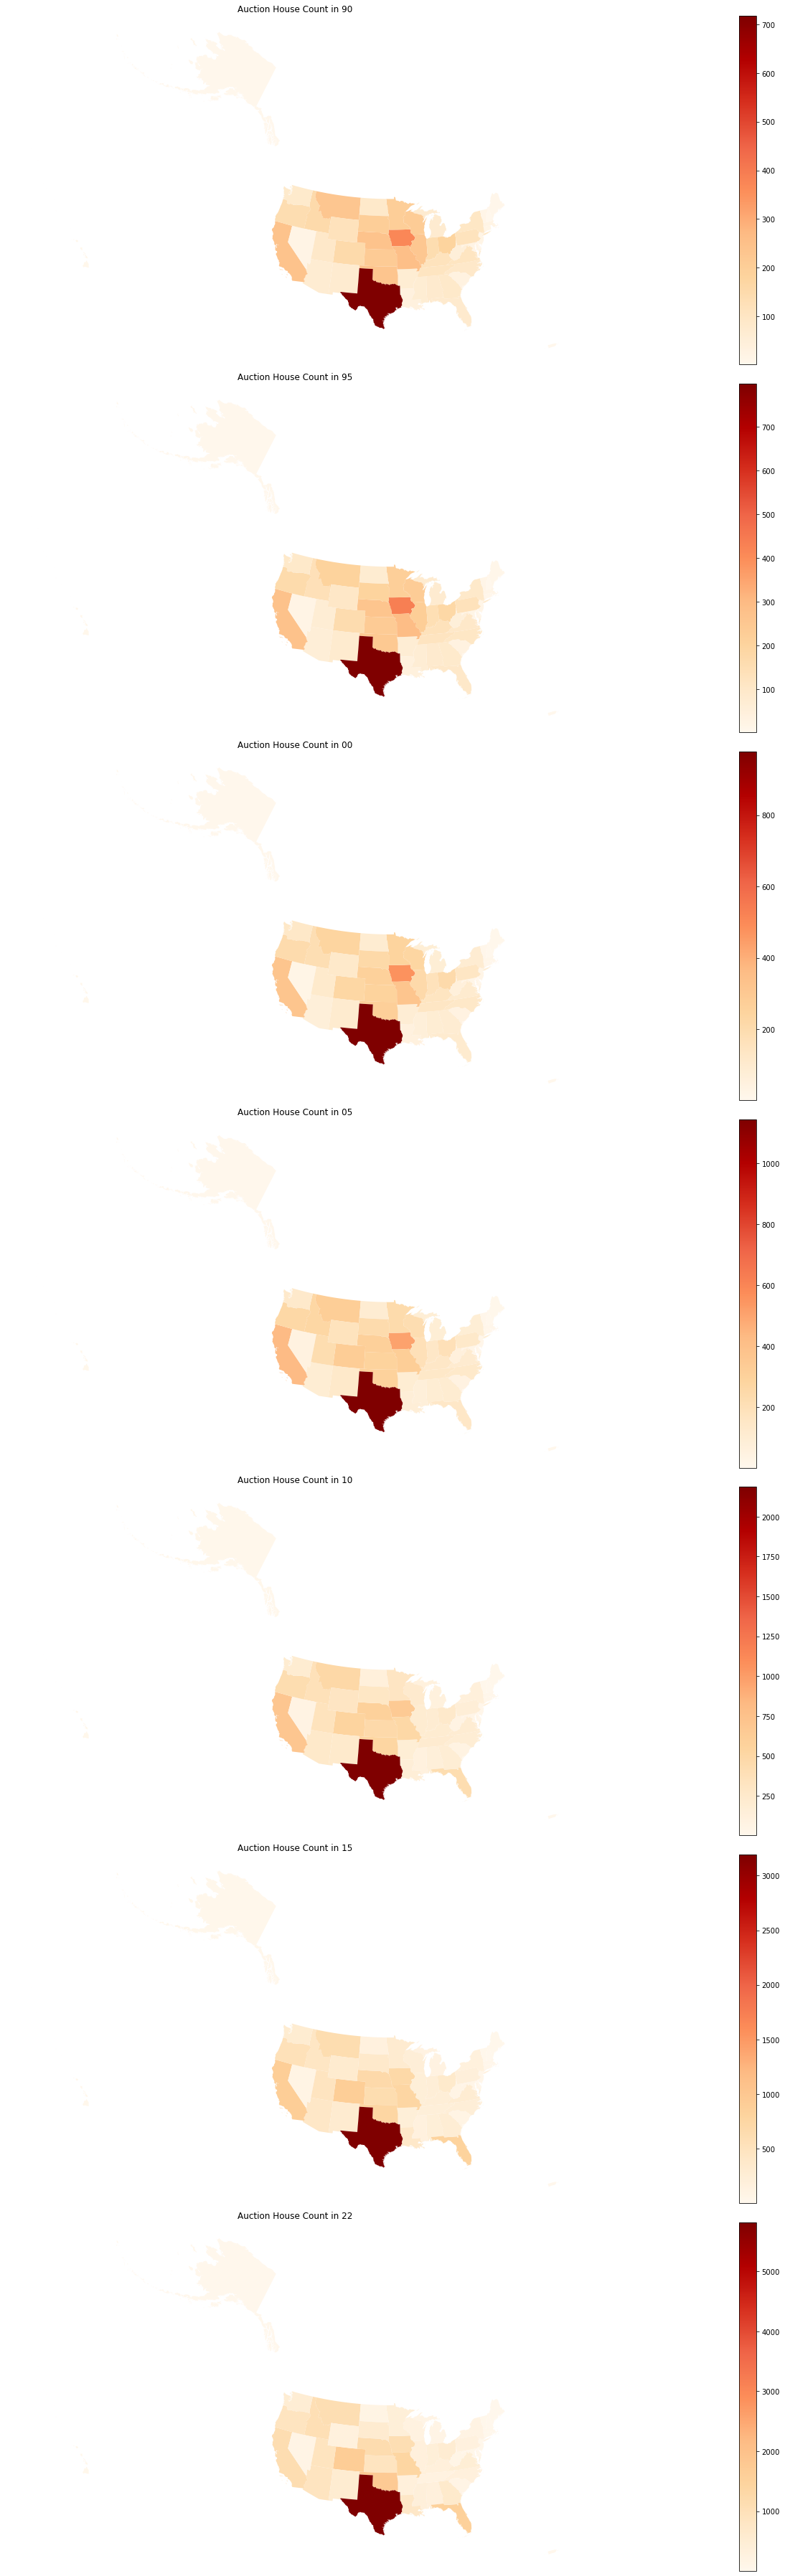

In [142]:
years = ['NAICS90', 'NAICS95', 'NAICS00', 'NAICS05', 'NAICS10', 'NAICS15', 'NAICS22']
# Plotting
fig, axs = plt.subplots(7,1, figsize=(60, 50))  # Adjust size as needed
axs = axs.flatten()
for i, year in enumerate(years):
    ax = axs[i]
    merged_year = merged_data[merged_data['Year'] == year]
    merged_year.plot(column='Count', ax=ax, legend=True, cmap='OrRd')  # OrRd colormap for density
    ax.set_title(f"Auction House Count in {year[-2:]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

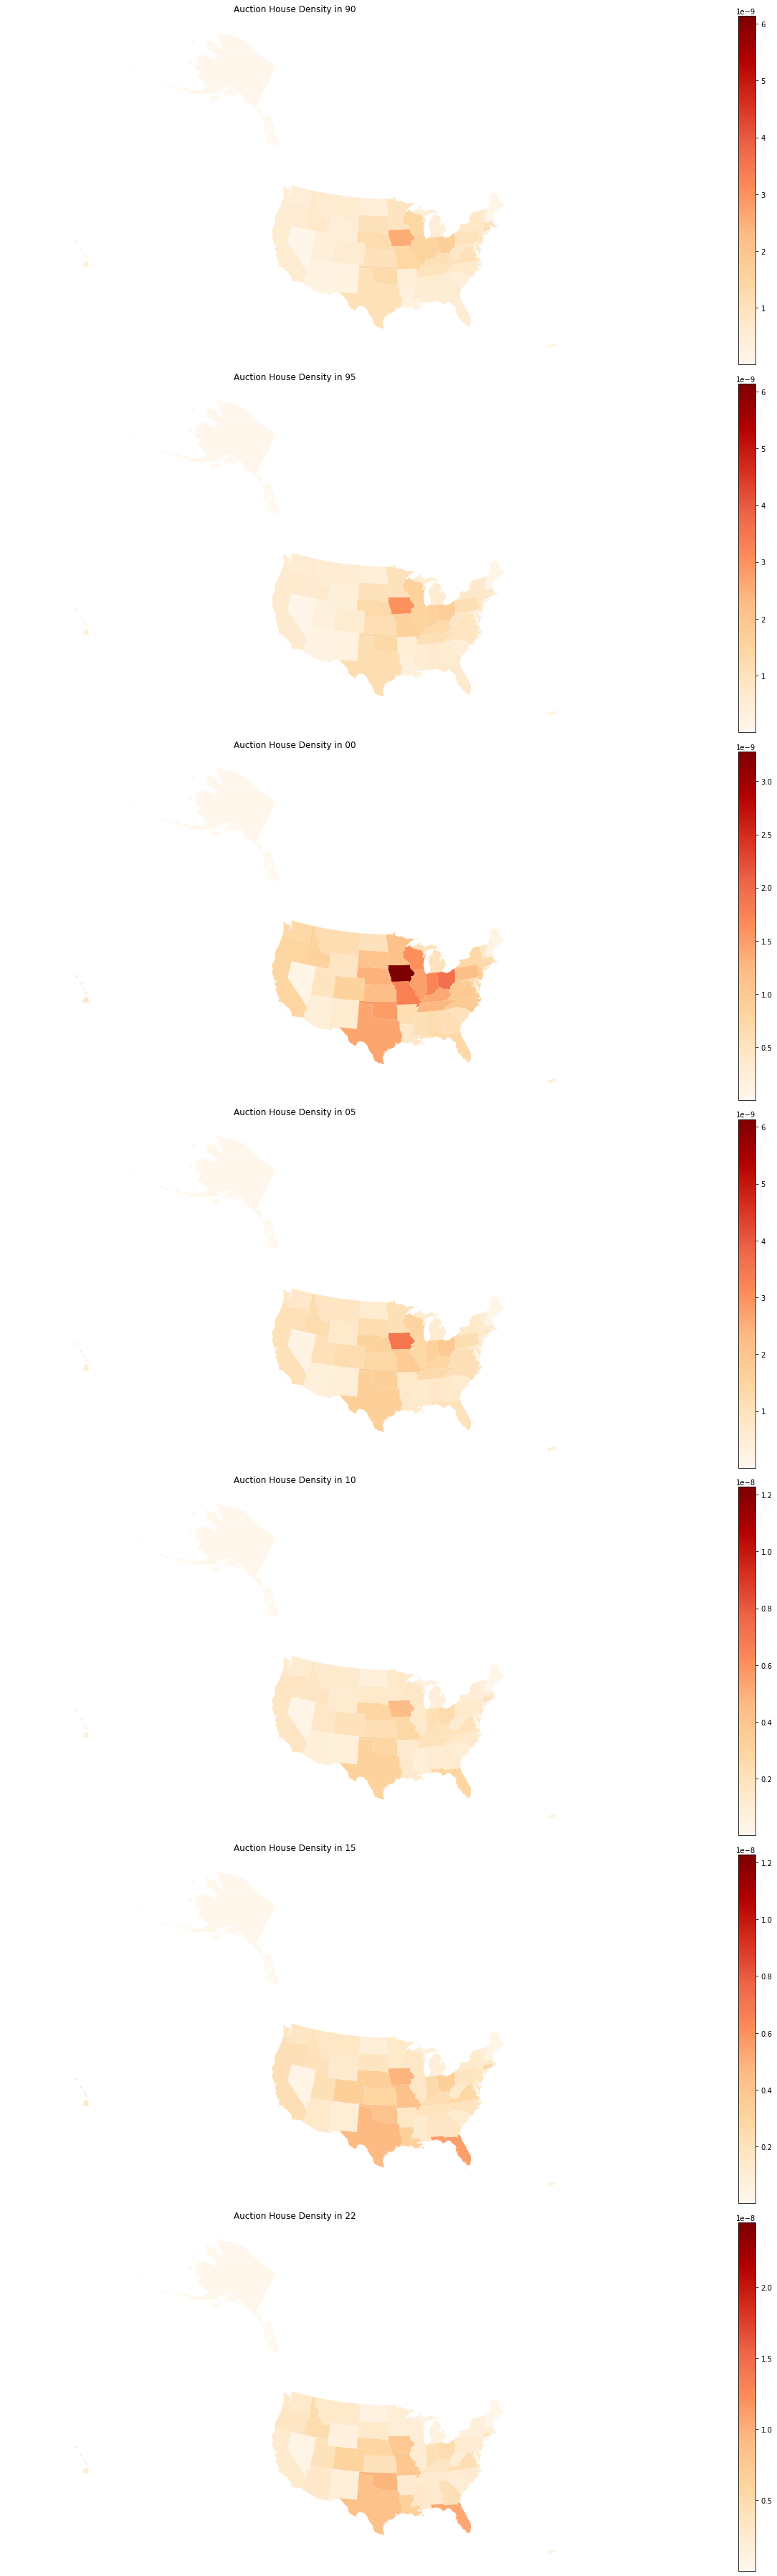

In [143]:
# Plotting
fig, axs = plt.subplots(7,1, figsize=(60, 50))  # Adjust size as needed
axs = axs.flatten()
for i, year in enumerate(years):
    ax = axs[i]
    merged_year = merged_data[merged_data['Year'] == year]
    merged_year.plot(column='density', ax=ax, legend=True, cmap='OrRd')  # OrRd colormap for density
    ax.set_title(f"Auction House Density in {year[-2:]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [106]:
# count of auction houses 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'companies' is your DataFrame
# companies = pd.read_csv('your_file.csv')  # Uncomment and modify this line if you're reading from a file

# Generate a list of year column names (NAICS90, NAICS91, ..., NAICS22)
years = ['NAICS' + str(year) for year in range(90, 100)] + ['NAICS0' + str(year) for year in range(0, 10)] + ['NAICS' + str(year) for year in range(10, 23)]

# Count auction houses for each year
auction_house_counts = {year: auction[year].count() for year in years}

# Convert to a DataFrame for plotting
counts_df = pd.DataFrame(list(auction_house_counts.items()), columns=['Year', 'Count'])
counts_df['Year'] = counts_df['Year'].apply(lambda x: int(x[-2:]) + 1900 if int(x[-2:]) > 20 else int(x[-2:]) + 2000)

counts_df['Year'] = counts_df['Year'].replace({1921: 2021, 1922: 2022})

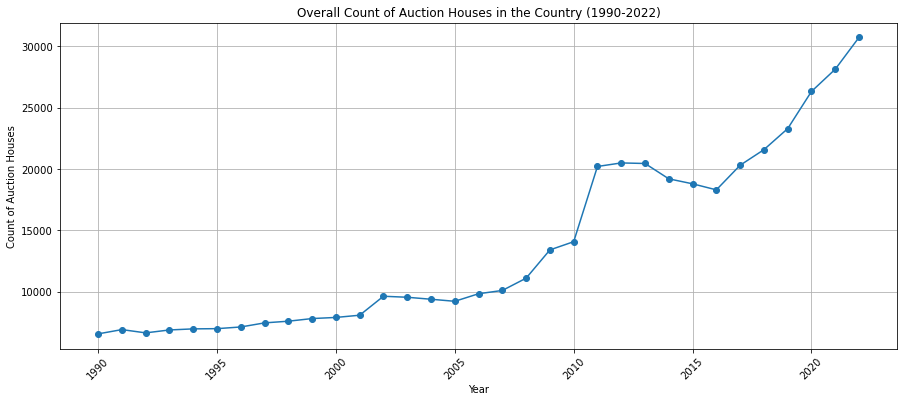

In [108]:
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(counts_df['Year'], counts_df['Count'], marker='o')
plt.title('Overall Count of Auction Houses in the Country (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Count of Auction Houses')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Sale by state**

In [127]:
# List of years for which you want to plot the sales data
years = ['Sales90', 'Sales00', 'Sales10', 'Sales22']

# Aggregating sales by state for each year
sales_by_state = {year: auction.groupby('State')[year].sum() for year in years}

In [128]:
sales_by_state

{'Sales90': State
 AK    6.667000e+05
 AL    3.277152e+08
 AR    1.538258e+08
 AZ    6.397098e+07
 CA    9.576952e+08
 CO    3.558939e+08
 CT    1.299332e+07
 DC    6.000000e+05
 DE    1.789770e+06
 FL    2.073641e+08
 GA    2.181009e+08
 HI    4.344594e+06
 IA    7.033056e+08
 ID    1.997009e+08
 IL    3.532245e+08
 IN    3.305306e+08
 KS    3.199824e+08
 KY    2.019712e+08
 LA    6.446521e+07
 MA    1.973240e+07
 MD    2.462573e+07
 ME    5.774630e+06
 MI    8.291736e+07
 MN    7.535013e+08
 MO    4.357209e+08
 MS    2.153355e+08
 MT    3.582196e+08
 NC    3.094173e+08
 ND    1.725051e+08
 NE    5.427943e+08
 NH    4.131000e+05
 NJ    2.022574e+07
 NM    1.196281e+08
 NV    1.738396e+07
 NY    1.369910e+08
 OH    2.271359e+08
 OK    3.937515e+08
 OR    1.465541e+08
 PA    3.240730e+08
 PR    4.281120e+05
 RI    2.500000e+05
 SC    1.064514e+08
 SD    4.429955e+08
 TN    2.556323e+08
 TX    1.609327e+09
 UT    8.795590e+07
 VA    3.073053e+08
 VT    1.217762e+07
 WA    1.055202e+08
 W

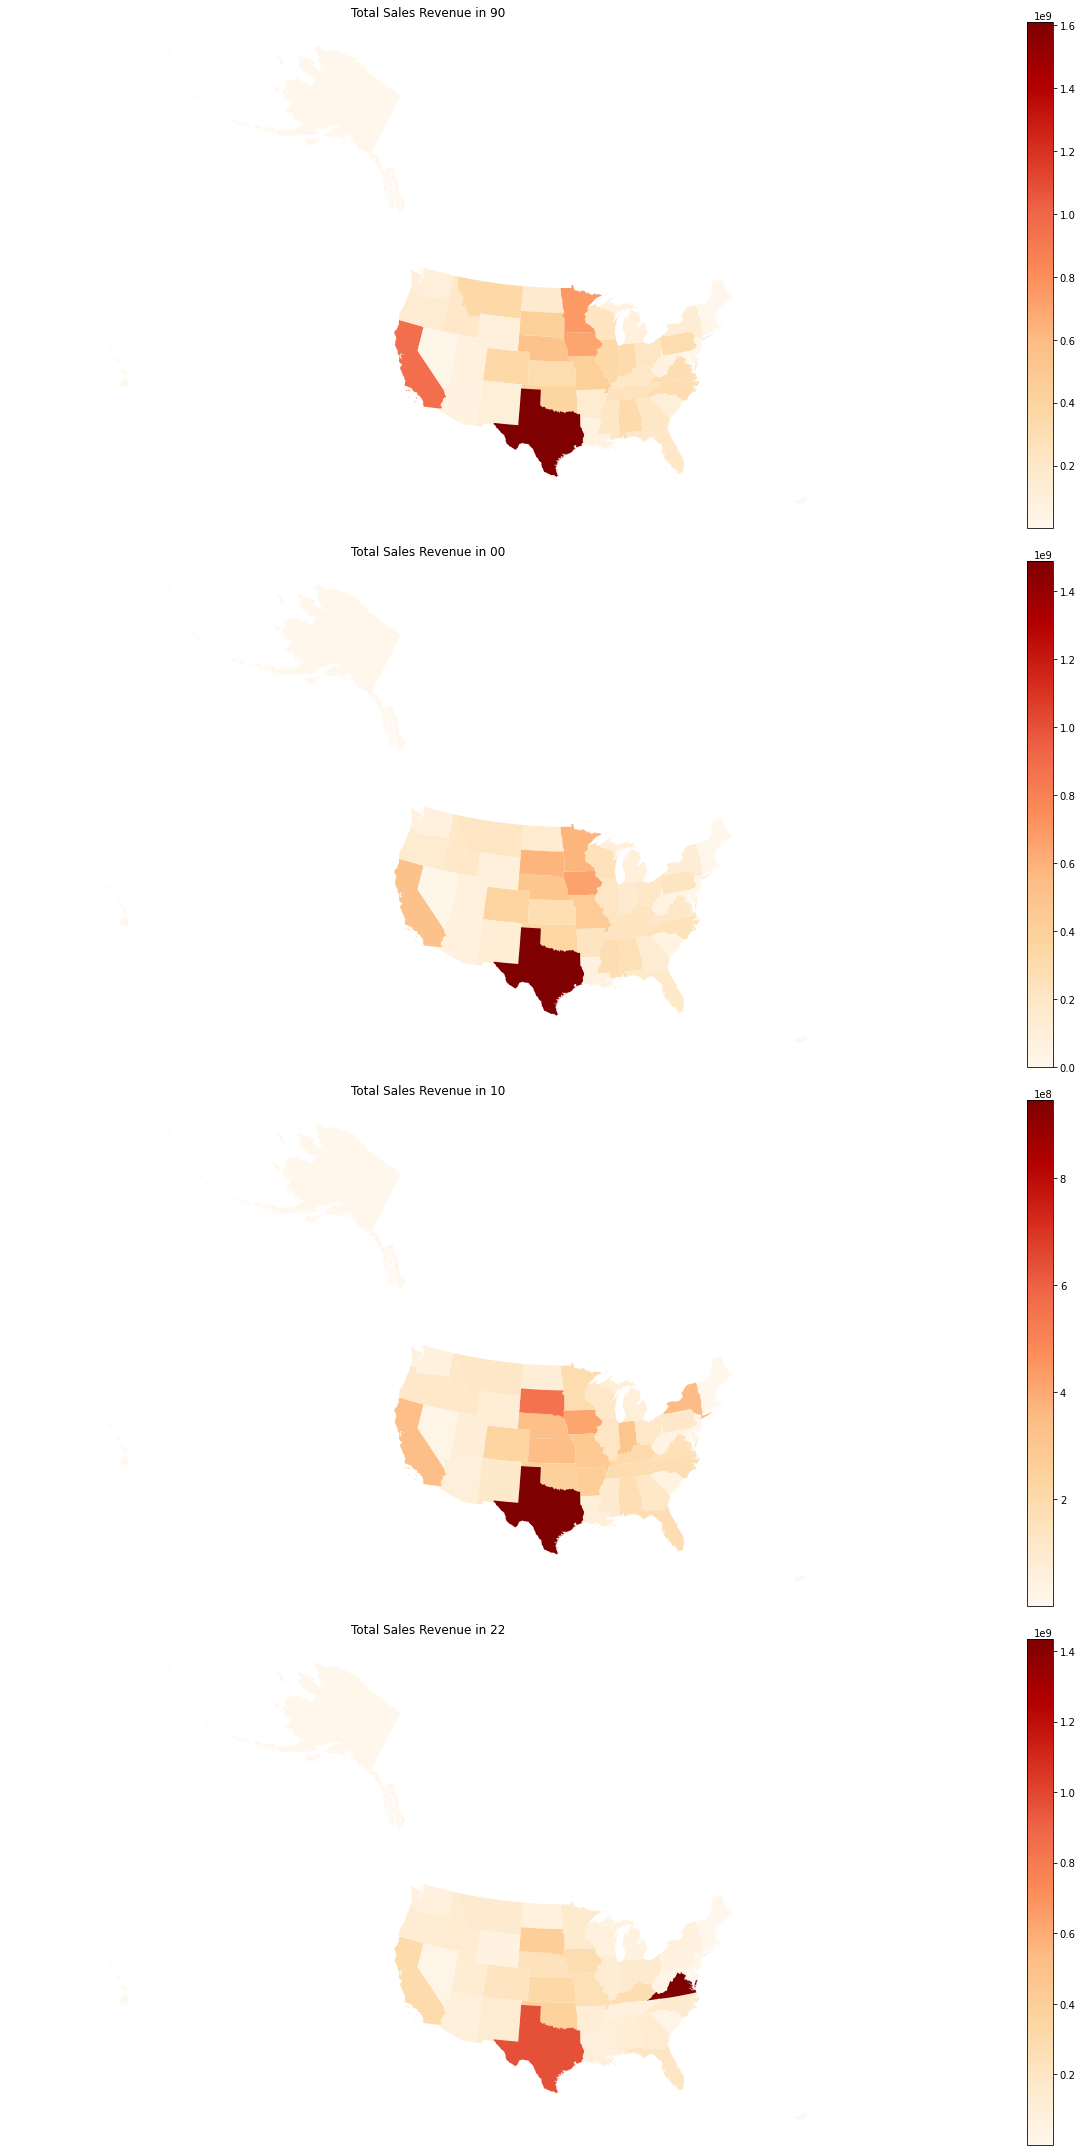

In [129]:
# Merging sales data with the shapefile for each year and plotting
fig, axs = plt.subplots(4, 1, figsize=(50, 30))  # Adjust the subplot layout as needed
axs = axs.flatten()

for i, year in enumerate(years):
    ax = axs[i]
    # Merge the sales data for the year with the shapefile
    merged_data = us_states.set_index('STUSPS').join(sales_by_state[year])
    
    # Plot the data
    merged_data.plot(column=year, ax=ax, legend=True, cmap='OrRd')  # OrRd colormap for sales revenue
    ax.set_title(f"Total Sales Revenue in {year[-2:]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [132]:
# Generate a list of sales column names for each year
sales_columns = ['Sales' + str(year) for year in range(90, 100)] + ['Sales' + '0' + str(year) for year in range(0, 10)] + ['Sales' + str(year) for year in range(10, 23)]

# Aggregate total sales for each year
total_sales = {year: auction[year].sum() for year in sales_columns}

# Convert to a DataFrame for plotting
total_sales_df = pd.DataFrame(list(total_sales.items()), columns=['Year', 'TotalSales'])

# Convert 'Year' to a more readable format (e.g., '1990', '1991', ...)
total_sales_df['Year'] = total_sales_df['Year'].apply(lambda x: int(x[-2:]) + 1900 if int(x[-2:]) > 20 else int(x[-2:]) + 2000)

total_sales_df['Year'] = total_sales_df['Year'].replace({1921: 2021, 1922: 2022})
total_sales_df

,Year,TotalSales
0,1990,1.212885e+10
1,1991,1.246765e+10
2,1992,1.402959e+10
3,1993,1.316951e+10
4,1994,1.290067e+10
5,1995,1.217100e+10
6,1996,1.215265e+10
7,1997,1.173273e+10
8,1998,1.159168e+10
9,1999,1.114832e+10


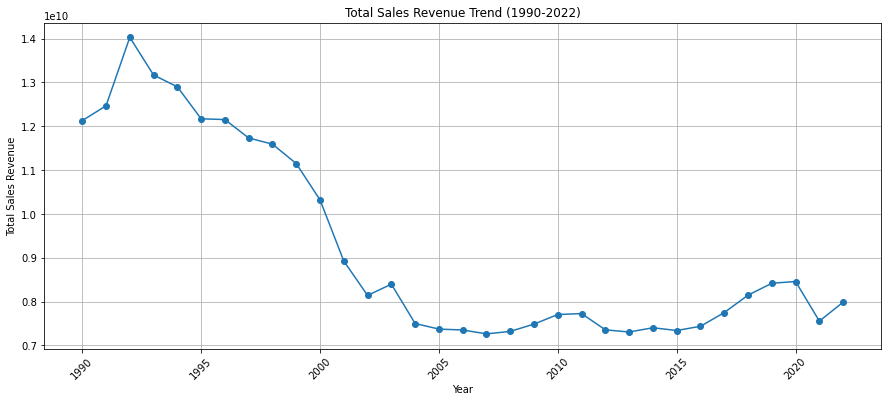

In [133]:
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(total_sales_df['Year'], total_sales_df['TotalSales'], marker='o')
plt.title('Total Sales Revenue Trend (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Total Sales Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()